In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# **Content**

* [1. About the Dataset](#1)
* [2. Load and Check Data](#2)
* [3. Image Preprocessing](#3)
* [4.Creating the Model](#4)
* [5.Test vs Prediction](#5)

# <a id="1"></a><br>
**1. About the Dataset**

* The Fashion MNIST database was created in 2017 as a more challenging classification task compared to the simple MNIST digits dataset.
* It is an instructive dataset commonly encountered by beginners interested in machine learning.
* The dataset consists of 70,000 grayscale images.
* Each image is 28x28 pixels in size.
* The dataset is divided into 60,000 training examples and 10,000 test examples.
* Fashion MNIST dataset is used for classifying different types of clothing items.
* The classes include t-shirts, trousers, dresses, bags, shoes, boots, sandals, shirts, sneakers, and coats.

# <a id="2"></a><br>
**2. Load and Check Data**

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_samples,train_labels),(test_samples,test_labels)=fashion_mnist.load_data()

In [4]:
train_samples.shape

(60000, 28, 28)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

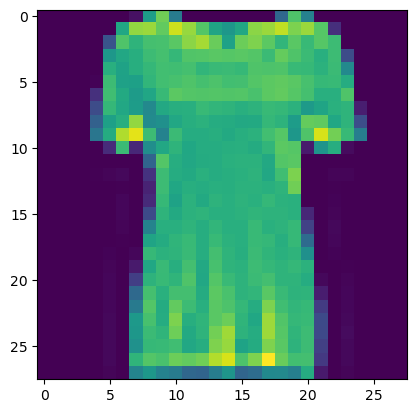

In [6]:
plt.imshow(train_samples[10])

In [7]:
train_samples

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Lets look at more samples

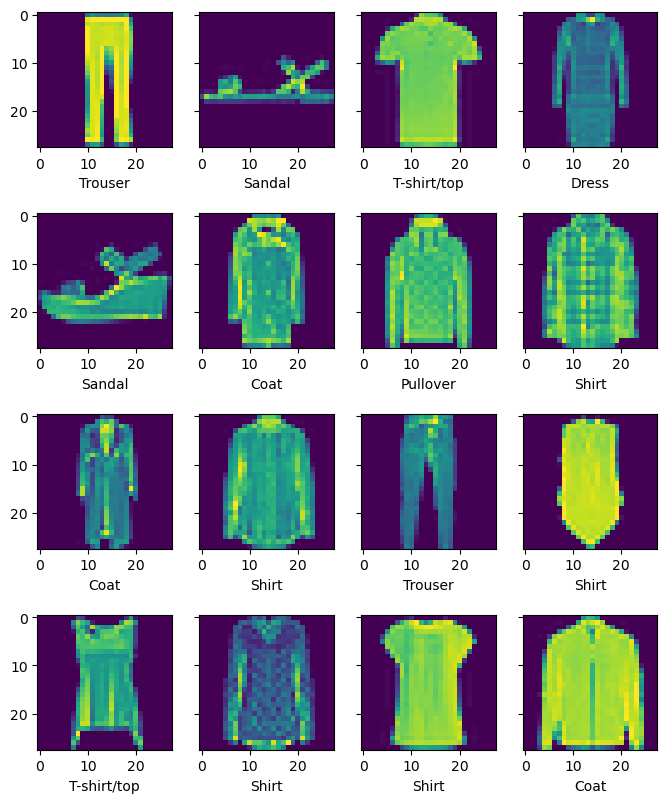

In [7]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(8,10),sharey=True)
axes=axes.flatten()
values=np.random.randint(1,60000,size=16)

for i,ax in zip(values,axes):
    ax.imshow(train_samples[i])
    ax.set_xlabel(class_names[train_labels[i]])

# <a id="3"></a><br>
**3.Image Preprocessing**

Let's scale the images to values between 0-1 before transferring them to the neural network. The reason we do this is because the gradient descent process cannot work with large values. Since images take pixel values between 0 and 255, if we divide the images by 255, we scale them between 0 and 1.

In [8]:
train_samples=train_samples/255.0
test_samples=test_samples/255.0

In [9]:
train_samples.shape

(60000, 28, 28)

# <a id="4"></a><br>
**4.Creating the Model**

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)]
)

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
history=model.fit(x=train_samples,y=train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5007 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3698 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3349 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3100 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2780 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2492 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [13]:
model.evaluate(test_samples,test_labels)

313/313 [==============================] - 0s 768us/step - loss: 0.3323 - accuracy: 0.8818


[0.33232423663139343, 0.8817999958992004]

Model turns out probability distribution for each sample so we the take maximum probabilty for each sample

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions=probability_model.predict(test_samples)

313/313 [==============================] - 0s 633us/step


In [16]:
predictions_list=np.argmax(predictions,axis=1)

# <a id="5"></a><br>
**5.Test vs Prediction**


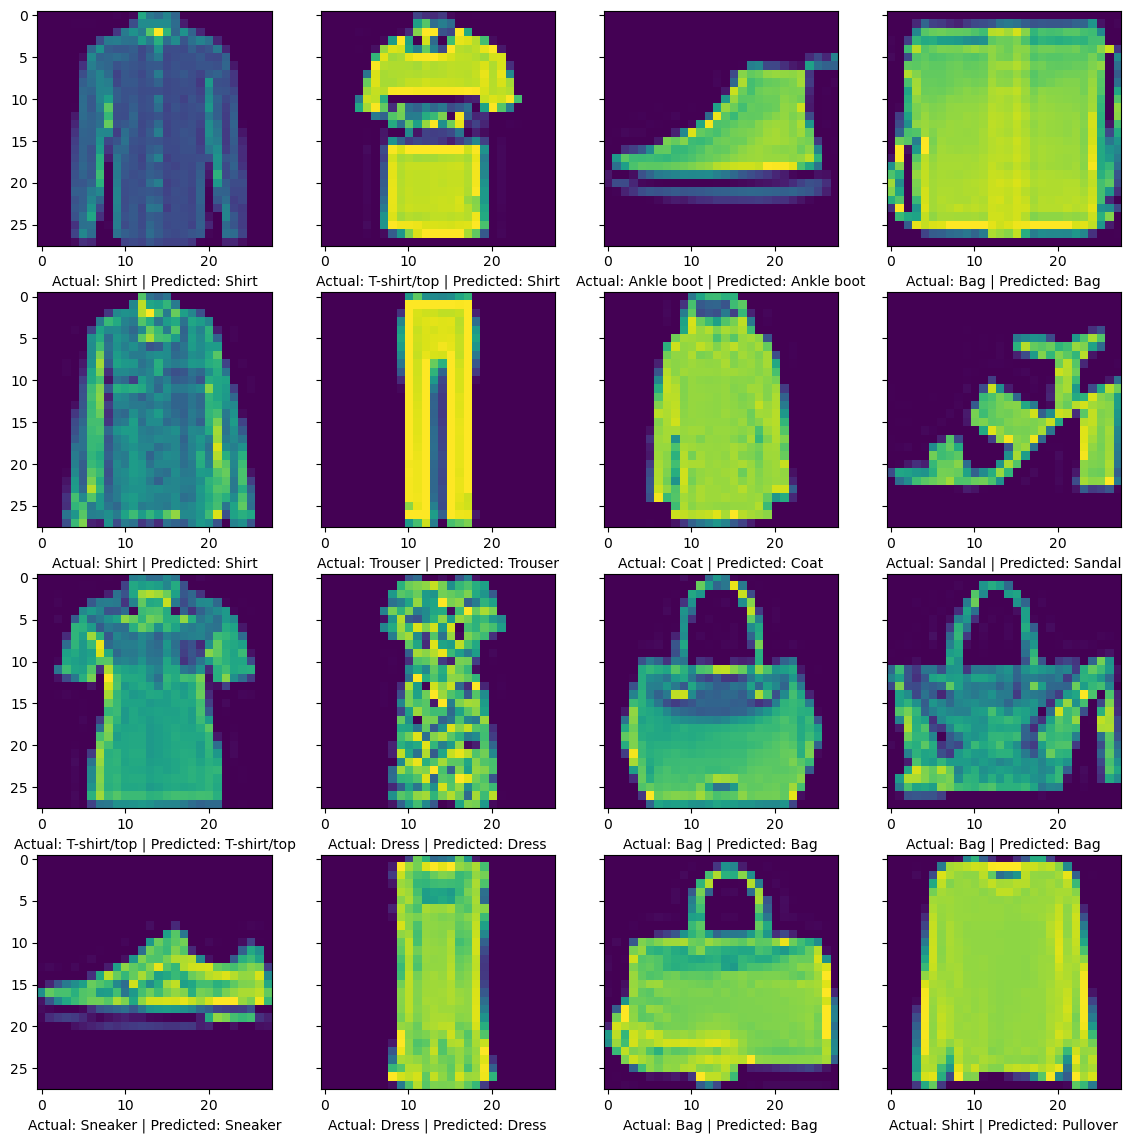

In [17]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(14,14),sharey=True)
axes=axes.flatten()
values=np.random.randint(1,10000,size=16)

for i,ax in zip(values,axes):
    ax.imshow(test_samples[i])
    ax.set_xlabel("Actual: "+class_names[test_labels[i]]+" | Predicted: "+class_names[predictions_list[i]])